## CREDICT DEFAULTERS PREDICTION USING KERAS IN PYTHON

The dataset belongs to TW banking system. Our aim here is to predict the credit defaulters with certain known parameters.

In [1]:
# Importing the required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import itertools
%matplotlib inline

G:\Python\Anaconda_1\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# setting up the working directory
os.chdir("C:\\Users\\320\\Python\\Keras\\")
os.getcwd()
# importing the dataset
TW_data = pd.read_csv("UCI_Credit_Card.csv")

In [3]:
TW_data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## UNDERSTANDING THE DATA
The first column mentions the customer ID. The IDs are unique and we will not need it to predict the outcome as it does not provide any information regarding the credit defaulting.Hence let us consider only the rest of the data. 

There are 23 other independent variables which are a combination of categoriical and numeric variables. The dependent varaible is binary shows whether the customer is a credit defaulter or not.

As the dependent variable is categorical this becomes a classification problem. In this exercise we use Keras to build an ANN in order to predict the credit defaulters.

As a first step we deeply take a look at the data and perform our EDA before proceeding with the modelling

In [7]:
# removing the customer id and name and saving the dependent varaibles 1n x
x = TW_data.iloc[:,1:24].values

# saving the independent variable in y
y = TW_data.iloc[:,24].values

print(x)
print(y)

[[2.0000e+04 2.0000e+00 2.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.2000e+05 2.0000e+00 2.0000e+00 ... 1.0000e+03 0.0000e+00 2.0000e+03]
 [9.0000e+04 2.0000e+00 2.0000e+00 ... 1.0000e+03 1.0000e+03 5.0000e+03]
 ...
 [3.0000e+04 1.0000e+00 2.0000e+00 ... 4.2000e+03 2.0000e+03 3.1000e+03]
 [8.0000e+04 1.0000e+00 3.0000e+00 ... 1.9260e+03 5.2964e+04 1.8040e+03]
 [5.0000e+04 1.0000e+00 2.0000e+00 ... 1.0000e+03 1.0000e+03 1.0000e+03]]
[1 1 0 ... 1 1 1]


In [8]:
x.shape

(30000, 23)

In [22]:
# Splitting the data set into train and test using train_test_split library for cross validation

from sklearn.cross_validation import train_test_split

# splitting the data in 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 111)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(21000, 23)
(21000,)
(9000, 23)
(9000,)


In [23]:
# scaling the data using the preprocessing library 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [10]:
x_train[:1]

array([[ 9.000e+04,  2.000e+00,  3.000e+00,  1.000e+00,  2.500e+01,
        -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00,  0.000e+00,
        -1.000e+00,  3.363e+03,  1.740e+02,  1.473e+03,  3.900e+02,
         3.900e+02,  7.800e+02,  1.740e+02,  1.473e+03,  7.800e+02,
         0.000e+00,  7.800e+02,  0.000e+00]])

## MODEL BUILDING USING KERAS

We have so far understood the data and made some preprocessing on the data in order to make the data suitable for our model. Now that our data is ready to be trained let us build our first Keras model.

We are here using a sequential model from the Keras as the data is simple.

In [11]:
# Importing the required modules from keras

from keras.models import Sequential
from keras.layers import Dense

In [12]:
# STEP 1:  initializing our model
class_model_keras = Sequential()

In [13]:
# STEP 2: Adding the layers to our NN. 
# In this step we add 1 i/p layer(which are the ips directly), multiple hidden layers & 1 o/p layer
# As there are 23 input variables there will be 23 nodes in the input layer
# Nodes in the hidden layer is free to our choice, however to have an optinum error
# we can calculate the nodes in our first hidden layer to be (I/p nodes + 1 )/2 = (23+1)/2 = 12

# While initializing random weights to the NN, 
# we pass the value to the hyperparameter init as "UNIFORM"
# UNIFORM will ensure that the weights are given uniformly random and close to 0

# Also we would be specifying what activation function to be used. LEt us use RELU in our model here


# 1st HIDDEN LAYER
class_model_keras.add(Dense(input_dim = 23, output_dim = 12, init = 'uniform', activation = 'relu'))

# 2nd Hidden Layer 
# as the input dim to this layer is the output from the previous layer 
# we need not explicitly specify it here
class_model_keras.add(Dense(output_dim = 12, init = 'uniform', activation = 'relu'))

# OUTPUT LAYER
# sigmoid activation is used to get the outout between 0 and 1.
class_model_keras.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

G:\Python\Anaconda_1\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=23, activation="relu", units=12, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
G:\Python\Anaconda_1\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=12, kernel_initializer="uniform")`
G:\Python\Anaconda_1\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`


In [14]:
# STEP 3: COMPILING THE NEURAL NETWORK
# In this step we have the liberty to choose the optimization method we would like to use 
# the loss fucntion and the metrics that we require ad outpur
# binary_crossentropy loss function used when a binary output is expected

class_model_keras.compile(optimizer='sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [24]:
# STEP 4: FITTING THE MODEL

class_model_keras.fit(x_train, y_train, batch_size = 10, nb_epoch = 100)

Epoch 1/100
  880/21000 [>.............................] - ETA: 3s - loss: 0.7616 - acc: 0.7886

G:\Python\Anaconda_1\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


21000/21000 [==============================] - 3s 131us/step - loss: 0.5915 - acc: 0.7684
Epoch 2/100
21000/21000 [==============================] - 3s 128us/step - loss: 0.5426 - acc: 0.7749
Epoch 3/100
21000/21000 [==============================] - 3s 139us/step - loss: 0.5244 - acc: 0.7763
Epoch 4/100
21000/21000 [==============================] - 3s 128us/step - loss: 0.4798 - acc: 0.7972
Epoch 5/100
21000/21000 [==============================] - 3s 145us/step - loss: 0.4627 - acc: 0.8078
Epoch 6/100
21000/21000 [==============================] - 3s 145us/step - loss: 0.4566 - acc: 0.8113
Epoch 7/100
21000/21000 [==============================] - 3s 134us/step - loss: 0.4529 - acc: 0.8139
Epoch 8/100
21000/21000 [==============================] - 3s 130us/step - loss: 0.4526 - acc: 0.8136
Epoch 9/100
21000/21000 [==============================] - 3s 130us/step - loss: 0.4486 - acc: 0.8160
Epoch 10/100
21000/21000 [==============================] - 3s 128us/step - loss: 0.4471 - acc

21000/21000 [==============================] - 3s 135us/step - loss: 0.4261 - acc: 0.8213
Epoch 81/100
21000/21000 [==============================] - 3s 137us/step - loss: 0.4261 - acc: 0.8215
Epoch 82/100
21000/21000 [==============================] - 3s 152us/step - loss: 0.4263 - acc: 0.8211
Epoch 83/100
21000/21000 [==============================] - 3s 156us/step - loss: 0.4259 - acc: 0.8209
Epoch 84/100
21000/21000 [==============================] - 3s 145us/step - loss: 0.4259 - acc: 0.8209
Epoch 85/100
21000/21000 [==============================] - 3s 142us/step - loss: 0.4263 - acc: 0.8206
Epoch 86/100
21000/21000 [==============================] - 3s 142us/step - loss: 0.4255 - acc: 0.8208
Epoch 87/100
21000/21000 [==============================] - 3s 146us/step - loss: 0.4256 - acc: 0.8214
Epoch 88/100
21000/21000 [==============================] - 3s 158us/step - loss: 0.4259 - acc: 0.8209
Epoch 89/100
21000/21000 [==============================] - 3s 145us/step - loss: 0.42

In [25]:
# STEP 5: PREDICTING THE RESULTS FOR TEST DATA

y_pred =  class_model_keras.predict_proba(x_test)

In [36]:
# As the values are the probabality we may need to set up a threshold to find the actual values

pred = (y_pred> 0.5)

In [27]:
target_names = [ 'no', 'yes']
# code from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')

Confusion matrix, without normalization
[[6612  368]
 [1285  735]]


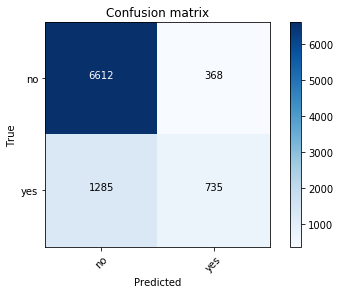

In [37]:
# Formulating the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)

plt.figure()
plot_confusion_matrix(cm, classes=target_names, normalize=False)
plt.show()

In [33]:
# Evaluating the Model

scores = class_model_keras.evaluate(x_test,y_test)

print("\nACCURACY: %.2f%%" % (scores[1]*100))

9000/9000 [==============================] - 0s 31us/step

ACCURACY: 81.63%


# CONCLUSION

Thus we have built our first model with Keras with 82 % accuracy